In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 一、数据基础分析

In [3]:
#  casual	registered 直接去除
df = pd.read_csv('train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


| datetime | 记录时间 |   
| season | 季节 |  
| holiday | 假期 |
| workday | 工作日 |  
| weather | 天气 | 0-3 数值越差 |   
| temp | 气温 |   
| atemp | 体感温度 |     
| humidity | 湿度 |     
| windspeed | 风速 |  
| casual | 注册用户租车辆 |   
| registered | 非用户租车辆 |   
| count | 租车辆 |  
记录每个小时的数据

In [4]:
# 需要将数据datetime进行加工，获取新的字段
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [5]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## 1.1 删除casual, registered

In [6]:
del df['casual']
del df['registered']

## 1.2 将datetime修改为时间类型，获取月份和小时

In [7]:
# 转时间类型
df['datetime'] = pd.to_datetime(df['datetime'])

In [8]:
df['hour'] = df['datetime'].map(lambda x: x.hour)
df['month'] = df['datetime'].map(lambda x: x.month)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4,1


数据分析、查看噪音，针对训练集来进行处理
## 1.3 数据切分为训练集和测试集

In [9]:
train = df.sample(frac=0.8) # 从原数据中随机抽取出80%
# 训练集数据和测试集数据不同
train.index

Int64Index([ 1257,  6640,  5673,  2990,  7356,  4844,  8444, 10875,  3586,
            10303,
            ...
              461,  8724,  2071,  3871,  6360,  4579,  6296,  6028,  8286,
             4089],
           dtype='int64', length=8709)

In [10]:
test = df.drop(index=train.index)
test.shape

(2177, 12)

## 1.4 查找噪音

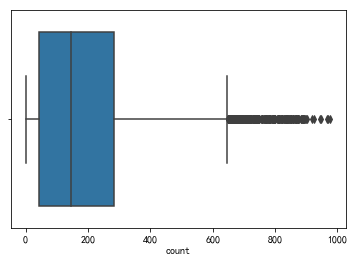

In [11]:
# 箱线图   分位数查找，噪音比较多
sns.boxplot(df['count'])

In [12]:
# 使用箱线图查找噪音数值比较多，影响预测效果
# 如果 x - 均值  大于  3倍标准差  认为噪音数据   总共 占比千分之一
# 查看训练集中噪音值得数量，将噪音值从训练集中剔除
noise = train[abs((train['count'] - train['count'].mean()) > (3 * train['count'].std()))]
noise.shape

(116, 12)

In [13]:
# 没有噪音的训练集
train = train[abs((train['count'] - train['count'].mean()) <= (3 * train['count'].std()))]

In [14]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,month
1257,2011-03-17 05:00:00,1,0,1,1,13.12,16.665,76,7.0015,13,5,3
6640,2012-03-13 23:00:00,1,0,1,1,22.96,26.515,56,8.9981,87,23,3
5673,2012-01-11 13:00:00,1,0,1,3,13.12,17.425,76,0.0000,65,13,1
2990,2011-07-13 12:00:00,3,0,1,1,34.44,37.880,41,19.0012,174,12,7
7356,2012-05-05 21:00:00,2,0,0,2,23.78,27.275,78,15.0013,269,21,5


# 二、数据可视化分析

字段对于预测count的结果是否有用

## 2.1离散特征数据分析

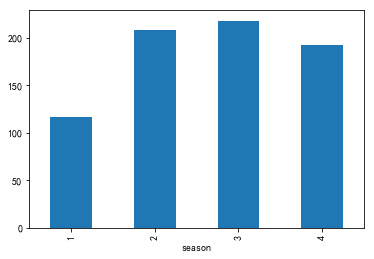

In [15]:
# 对season进行处理
train.groupby('season').mean()['count'].plot(kind='bar')

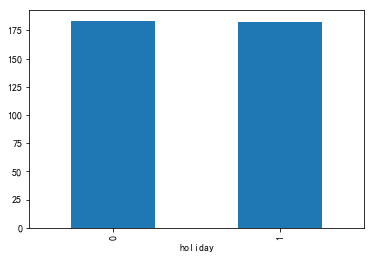

In [16]:
# 对holiday进行分析
train.groupby('holiday').mean()['count'].plot(kind='bar')

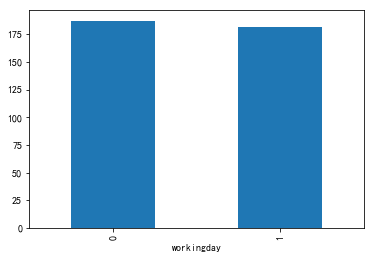

In [17]:
# 对workingday进行分析
train.groupby('workingday').mean()['count'].plot(kind='bar')

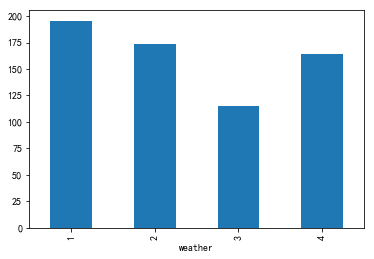

In [18]:
# 对 weather进行分析
train.groupby('weather').mean()['count'].plot(kind='bar')

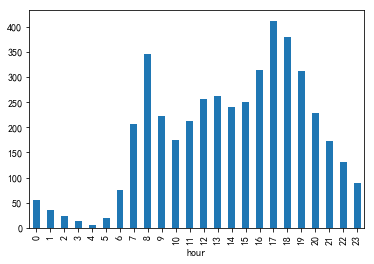

In [19]:
# 按照小时分析
train.groupby('hour').mean()['count'].plot(kind='bar')

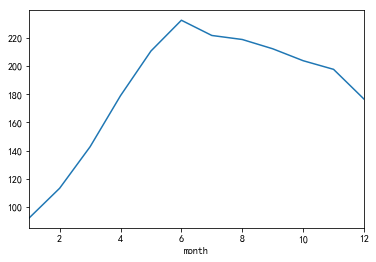

In [20]:
# 按照月划分
train.groupby('month').mean()['count'].plot()

根据刚才的分析  
season， weather， hour， month 有用  
hour  分出早高峰、晚高峰、平时流量、低谷期  
month  用车数量较多的月，较少的月

In [21]:
# 按照流量分
hour_count = train.groupby('hour').mean()['count'].reset_index().sort_values('count', ascending=False)
hour_count

,hour,count
17,17,412.034591
18,18,379.412121
8,8,345.683761
16,16,313.414835
19,19,311.853994
13,13,261.735294
12,12,256.706806
15,15,250.649573
14,14,240.743017
20,20,227.508287


In [22]:
# 数据分为4段 直接映射处理
def fn(x):
    if x in hour_count.iloc[:6]['hour']:
        return '高峰'
    elif x in hour_count.iloc[6: 12]['hour']:
        return '中高峰'
    elif x in hour_count.iloc[12:18]['hour']:
        return '正常'
    else:
        return '低谷'
train['hour_count'] = train['hour'].map(fn)
test['hour_count'] = test['hour'].map(fn)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,month,hour_count
1257,2011-03-17 05:00:00,1,0,1,1,13.12,16.665,76,7.0015,13,5,3,低谷
6640,2012-03-13 23:00:00,1,0,1,1,22.96,26.515,56,8.9981,87,23,3,正常
5673,2012-01-11 13:00:00,1,0,1,3,13.12,17.425,76,0.0000,65,13,1,高峰
2990,2011-07-13 12:00:00,3,0,1,1,34.44,37.880,41,19.0012,174,12,7,中高峰
7356,2012-05-05 21:00:00,2,0,0,2,23.78,27.275,78,15.0013,269,21,5,正常


## 2.2 连续特征分析

连续特征数据是否正常  
连续特征和标签之间的关系  
连续特征之间关联度是否大  

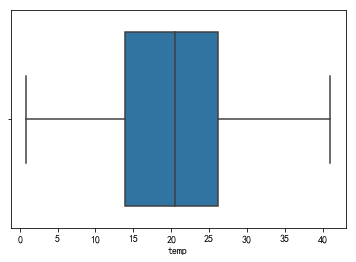

In [23]:
# 分布状态  噪音数据？ 箱线图
sns.boxplot(df['temp'])

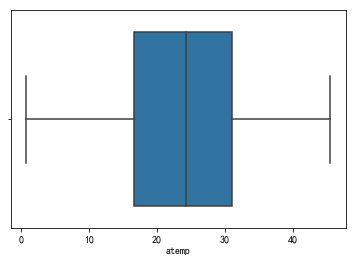

In [24]:
sns.boxplot(df['atemp'])

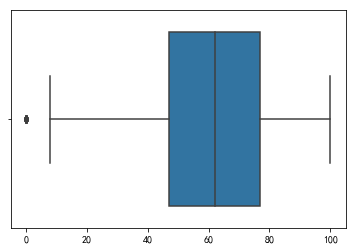

In [25]:
sns.boxplot(df[['humidity']])

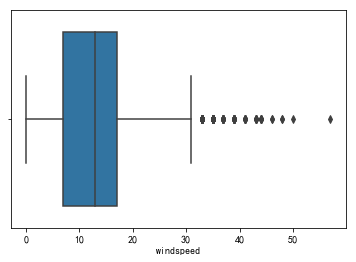

In [26]:
sns.boxplot(train['windspeed'])

现在找到两个特征中存在异常值，占比

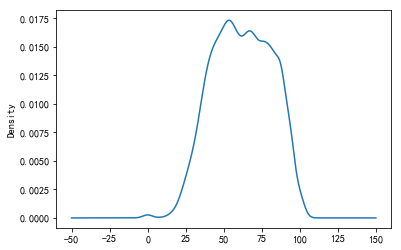

In [27]:
# 有可能传感器损坏
# 1.不管
# 2.为0，认为是缺失值，进行删除
train['humidity'].plot(kind='kde')

In [28]:
# 删除humidity为0的数据
train = train[train['humidity']>0]
test = test[test['humidity']>0]

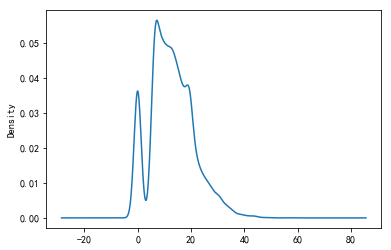

In [29]:
train['windspeed'].plot(kind='kde')

In [30]:
train['windspeed'].describe() # 风速不调整异常值，可以很好进行预测

count    8575.000000
mean       12.796088
std         8.139921
min         0.000000
25%         7.001500
50%        12.998000
75%        16.997900
max        56.996900
Name: windspeed, dtype: float64

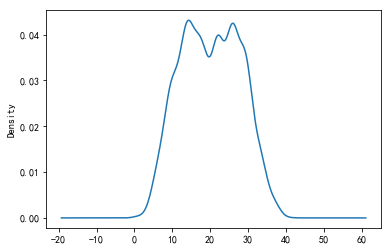

In [31]:
train['temp'].plot(kind='kde')

In [32]:
# 连续值转为离散值，  离散值分组统计平均用车辆
# 舒适温度    12-  12-17  17- 23   23-28   28-33  33+
def fn(x):
    if x < 12:
        return 0
    elif x >=12 and x <17:
        return 1
    elif x >= 17 and x < 23:
        return 2
    elif x >= 23 and x < 28:
        return 3
    elif x>=28 and x<33:
        return 4
    else:
        return 5
train['wendu'] = train['temp'].map(fn)
test['wendu'] = test['temp'].map(fn)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,month,hour_count,wendu
1257,2011-03-17 05:00:00,1,0,1,1,13.12,16.665,76,7.0015,13,5,3,低谷,1
6640,2012-03-13 23:00:00,1,0,1,1,22.96,26.515,56,8.9981,87,23,3,正常,2
5673,2012-01-11 13:00:00,1,0,1,3,13.12,17.425,76,0.0000,65,13,1,高峰,1
2990,2011-07-13 12:00:00,3,0,1,1,34.44,37.880,41,19.0012,174,12,7,中高峰,5
7356,2012-05-05 21:00:00,2,0,0,2,23.78,27.275,78,15.0013,269,21,5,正常,3


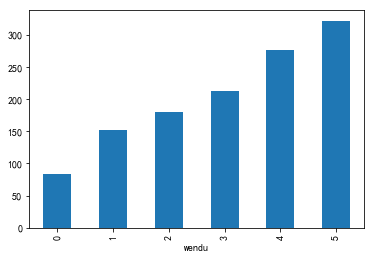

In [33]:
# 将温度分析
train.groupby('wendu').mean()['count'].plot(kind='bar')

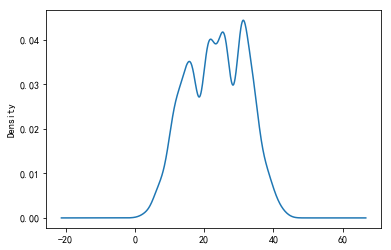

In [34]:
train['atemp'].plot(kind='kde')

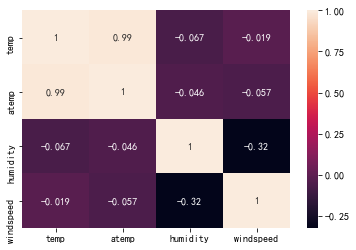

In [35]:
# 分析特征之间关联性   皮尔逊系数  -1 -- 1   越接近0相关性越低  0.6
corr = train[['temp', 'atemp', 'humidity', 'windspeed']].corr()
#  热图 annot 显示数值
sns.heatmap(corr, annot=True)
# temp atemp相似度过高，需要去除

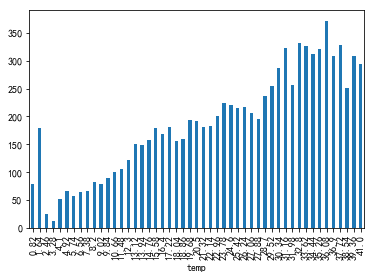

In [36]:
# 分析温度数据是否合理
train.groupby('temp').mean()['count'].plot(kind='bar')

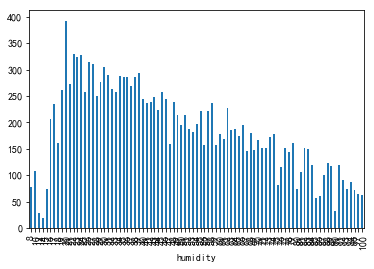

In [37]:
train.groupby('humidity').mean()['count'].plot(kind='bar')

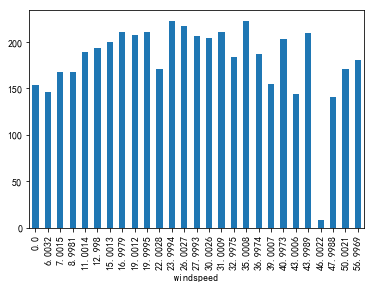

In [38]:
train.groupby('windspeed').mean()['count'].plot(kind='bar')

## 2.3 多特征分析

In [39]:
# 分析 是否是工作日 和 小时 两个特征和 租车辆关系
wh = train.groupby(['workingday', 'hour']).mean()['count'].reset_index()
wh

,workingday,hour,count
0,0,0,92.513274
1,0,1,74.119658
2,0,2,52.641026
3,0,3,26.065041
4,0,4,8.442478
5,0,5,9.200000
6,0,6,18.719298
7,0,7,48.640351
8,0,8,115.546218
9,0,9,171.418605


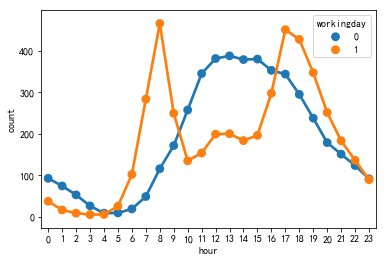

In [40]:
# 折线图   hue按照数值绘制多条曲线， data 需要处理的数据
sns.pointplot(x='hour', y='count', hue='workingday', data=wh)
# 分析结果  hourcount效果差，删除
# 根据当前输出，创建新字段wh 分别映射工作日，休息 高峰时段 0   一般时段 1    低谷时段 2

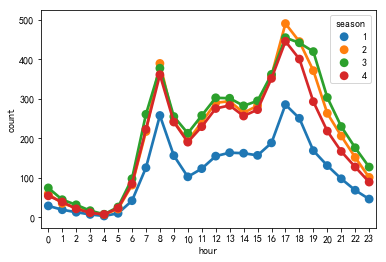

In [41]:
sh = train.groupby(['season', 'hour']).mean()['count'].reset_index()
sns.pointplot(x='hour', y='count', hue='season', data=sh)

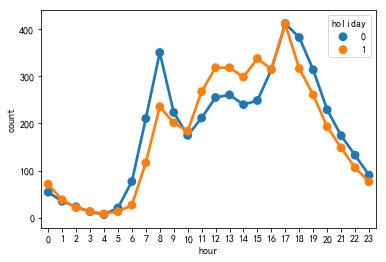

In [42]:
hh = train.groupby(['holiday', 'hour']).mean()['count'].reset_index()
sns.pointplot(x='hour', y='count', hue='holiday', data=hh)

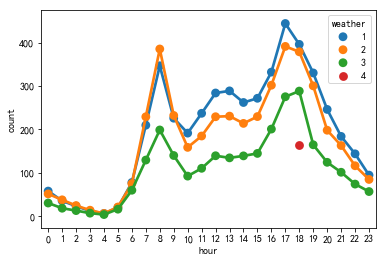

In [43]:
wh = train.groupby(['weather', 'hour']).mean()['count'].reset_index()
sns.pointplot(x='hour', y='count', hue='weather', data=wh)

In [44]:
# 分析结果  hourcount效果差，删除
# del train['hour_count']
# del test['hour_count']
# 0    w=1 h=7,8,9  17-20   w=0 10-19  
#  1    w=1  h 10 - 16    w=0  h8,9   20-23
# 2  其他
# 根据工作日和小时可视化输出，创建新字段wh 分别映射工作日，休息 高峰时段 0   一般时段 1    低谷时段 2
def fn(workingday, hour):
    # 如果是假期
    if workingday == 0:
        if hour >= 10 and hour<=19:
            return 0
        elif hour in [8,9,20,21,22,23]:
            return 1
        else:
            return 2
    else: # 工作日
        if hour in [7,8,9,17,18,19,20]:
            return 0
        elif hour>=10 and hour<=16:
            return 1
        else:
            return 2
# 连续值转变为离散值  特征数值和标签之间的结果没有太大相关性
train['wh'] = train.apply(lambda x: fn(x['workingday'], x['hour']), axis=1)
test['wh'] = test.apply(lambda x: fn(x['workingday'], x['hour']), axis=1)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,month,hour_count,wendu,wh
1257,2011-03-17 05:00:00,1,0,1,1,13.12,16.665,76,7.0015,13,5,3,低谷,1,2
6640,2012-03-13 23:00:00,1,0,1,1,22.96,26.515,56,8.9981,87,23,3,正常,2,2
5673,2012-01-11 13:00:00,1,0,1,3,13.12,17.425,76,0.0000,65,13,1,高峰,1,1
2990,2011-07-13 12:00:00,3,0,1,1,34.44,37.880,41,19.0012,174,12,7,中高峰,5,1
7356,2012-05-05 21:00:00,2,0,0,2,23.78,27.275,78,15.0013,269,21,5,正常,3,1


# 三、数据预处理

In [45]:
# 删除没有用处的数据
cols = ['datetime', 'workingday', 'atemp']
for i in cols:
    del train[i]
    del test[i]
# 验证训练集和测试集中的数据列相同
print(train.columns)
print(test.columns)

Index(['season', 'holiday', 'weather', 'temp', 'humidity', 'windspeed',
       'count', 'hour', 'month', 'hour_count', 'wendu', 'wh'],
      dtype='object')
Index(['season', 'holiday', 'weather', 'temp', 'humidity', 'windspeed',
       'count', 'hour', 'month', 'hour_count', 'wendu', 'wh'],
      dtype='object')


In [46]:
# 正常分析过程结束后，保存数据，重启一个代码编写模型
train.to_csv('train1.csv') # 保存成csv文件
test.to_csv('test1.csv')

In [47]:
train.head()

,season,holiday,weather,temp,humidity,windspeed,count,hour,month,hour_count,wendu,wh
1257,1,0,1,13.12,76,7.0015,13,5,3,低谷,1,2
6640,1,0,1,22.96,56,8.9981,87,23,3,正常,2,2
5673,1,0,3,13.12,76,0.0000,65,13,1,高峰,1,1
2990,3,0,1,34.44,41,19.0012,174,12,7,中高峰,5,1
7356,2,0,2,23.78,78,15.0013,269,21,5,正常,3,1


### 特征预处理方式
#### 特征缩放   temp   humidity  windspeed  
#### season  weather   从0开始
#### 独热编码化   hour  month  wendu  wh  
#### 使用训练集训练模型，并对L1，L2进行调参处理，找到最优的参数，打印测试集得分

In [48]:
y_train = train[['count']]
x_train = train.drop('count', axis=1)
y_test = test[['count']]
x_test = test.drop('count', axis=1)

In [49]:
# 特征缩放 temp humidity windspeed
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [50]:
lianxu = ['temp', 'humidity', 'windspeed']
std = StandardScaler() # 标准化
std.fit(x_train[lianxu])
# 分别获取训练集和测试集标准化后的数据
x_train_lianxu = std.transform(x_train[lianxu])
x_test_lianxu = std.transform(x_test[lianxu])

In [51]:
# season weather 从0开始
x_train['season'] = x_train['season'] - 1
x_train['weather'] = x_train['weather'] - 1
x_test['season'] = x_test['season'] - 1
x_test['weather'] = x_test['weather'] - 1

In [52]:
# 离散特征变为独热编码形式
lisan = ['season', 'holiday', 'weather', 'hour',
       'month', 'hour_count', 'wendu', 'wh']
onehot = OneHotEncoder()
onehot.fit(x_train[lisan])
x_train_onehot = onehot.transform(x_train[lisan]).toarray()
x_test_onehot = onehot.transform(x_test[lisan]).toarray()
x_train_onehot

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [55]:
# 合并处理好的连续值和离散值
x_train = np.c_[x_train_lianxu, x_train_onehot]
x_test = np.c_[x_test_lianxu, x_test_onehot]
x_train.shape

(8575, 62)

# 四、模型预测处理

## 4.1 模型调优  L1  L2  找出最优参数和最优得分

In [56]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV

In [58]:
l1 = Lasso()
pg = {'alpha': np.linspace(0, 1, 20)}
# 创建模型
m1 = GridSearchCV(l1, pg, cv=5)
m1.fit(x_train, y_train)
print('最优参数', m1.best_params_)
print('最优得分', m1.best_score_)

最优参数 {'alpha': 0.0}
最优得分 0.7345186856804546


In [59]:
l2 = Ridge()
m2 = GridSearchCV(l2, pg, cv=5)
m2.fit(x_train, y_train)
print('最优参数', m2.best_params_)
print('最优得分', m2.best_score_)

最优参数 {'alpha': 1.0}
最优得分 0.7345313035478789


## 4.2 使用性能最好的模型训练并预测测试集的结果

In [60]:
# 两个模型最优的参数创建模型
l1 = Lasso(alpha=0)
l1.fit(x_train, y_train)
l1.score(x_test, y_test)

0.7103527150812261

In [61]:
l2 = Ridge(alpha=1)
l2.fit(x_train, y_train)
l2.score(x_test, y_test)

0.7103465518018899

## 4.3 打印测试集得分

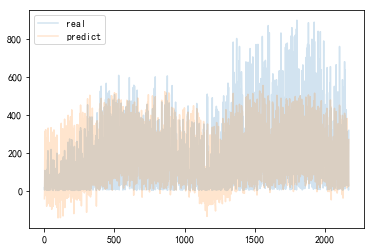

In [67]:
# 可视化预测效果
plt.plot(range(2173), y_test, label='real', alpha=0.2)
plt.plot(range(2173), l2.predict(x_test), label='predict', alpha=0.2)
plt.legend()

In [68]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
tree.score(x_test, y_test)

0.6949773043089809